In [ ]:
# TRUYỀN THỐNG
- Lưu token ở phía Backend
- Chọc vào Backend để so sánh token xem có hợp lệ hay không?

# JSON Web Token
- Không cần lưu token phía Backend



In [ ]:
# Ví dụ thực tế: Giao hàng tiết kiệm
- Đăng ký tài khoản để làm việc với GHTK
- Để chắc chắn đúng là "Tôi" thì được gửi sang GHTK
  > Có thể bên GHTK cung cấp cho chúng ta `secretKey` (Chỉ 2 bên biết)
  > Rồi họ nói: "Nếu bạn muốn gọi API được sang hệ thống của tôi thì hãy cầm `secretKey` và ký ra `JWT token`. Sau đó mỗi lần gọi sang hệ thống của tôi, hãy đem theo `JWT token` đó. Nếu tôi verify thấy hợp lệ --> thì tôi cho các bạn vào

---

Tức là khi họ cấp cho chúng ta tài khoản, thì họ cấp cho:
- API_Key: `F8-123abc`
- Secret Key: `456xyz`

- Sau đó nếu chúng ta muốn gọi ship hàng thì chúng ta gọi API sang bên GHTK để đẩy thông tin sang, rồi bên đó sẽ lên đơn và đến lấy hàng

- Backend của chúng ta:
	- GHTK bảo bạn hãy tự tạo JWT:
		+ Payload: { sub: API_Key }
		+ Dùng SecretKey để `sign` ra JWT token

- Đứng từ hệ thống của chúng ta gọi sang GHTK
- Họ sẽ nhận JWT token đó, và lấy chính `SecretKey` mà 2 bên đã thoả thuận với nhau để họ verify. 
	+ Nếu hợp lệ, thì họ cho phép mình truy cập hệ thống của họ và lên đơn hàng. Họ xác minh tài khoản của mình bằng sub: API_key do họ cung cấp (không trùng nhau giữa các đơn vị)

> **Đảm bảo cơ chế bảo mật!!**

---
Với mô hình Micro Service (Mô hình dịch vụ nhỏ). Tức là 1 con Backend được chặt ra thành nhiều con Backend nhỏ hơn khác nhau.VD:
+ 1 con chỉ xử lý phần Authentication
+ 1 con chỉ xử lý phần Block
+ ...
> Chúng tương tác với nhau bằng một giao thức khác

Vậy khi họ tương tác giữa nhiều service, mà các service đó cùng có Authentication. VD:

Micro service: 

- Auth Service: Nhiệm vụ đăng ký/đăng nhập và cấp token
- Cả A, B, C đều được bảo vệ, phải có token mới verify được

- Service A
- Service B
- Service C

- DB: tokens

> Giả sử nếu chúng ta làm theo cách truyền thống:
- Khi Auth Service tạo ra token thì kết nối và lưu chúng vào DB
- Khi các Service liên hệ với nhau hoặc từ Client, thì phải chọn vào DB để lấy token rồi verify
> Tức là nó cứ bị phụ thuộc nhau, khó bảo trì, rối loạn

---
Nói chung là:
1. ở bước tạo token và verify, Theo cách 1 thì đều phải chọc vào DB để verify
2. Nhưng theo cách dùng JWT thì không cần chọc vào DB (Vì JWT token không liên quan gì đến DB)
	> Như vậy nó cắt đi sự phụ thuộc giữa Auth Service với DB, không bị rào cản bởi ngôn ngữ lập trình khác nhau (Python, Golang...)
	> Vì chỉ cần SecretKey là làm đúng công thức `ký` thôi

---

- Cái việc mà không lưu trữ token như vậy được gọi là Stateless
Stateless: Khi chúng ta triển khai hệ thống mà không mang trạng thái.
- VD: ở frontend, một Component mà trong đó không sử dụng State thì gọi là `Stateless`, còn sử dụng State thì gọi `Stateful`

VD 1: 
Component: <Greeting message="Hello" /> --> UI hiển thị: "Hello"
Component: <Greeting message="Hi" /> --> UI hiển thị: "Hi"
`--> Stateless`
Vì bản thân Component này không chứa những logic làm thay đổi dữ liệu, mà dữ liệu phụ thuộc vào bên ngoài truyền vào. **Nên chúng ta truyền đầu vào là gì, thì đầu ra chính là cái đó**

VD 2: Mỗi lần gọi là sinh chuỗi ngẫu nhiên
<Random /> -->  UI hiển thị: 12u3hgf12
<Random /> -->  UI hiển thị: 46tgbfssdc

--> `Stateful`: Vì bản thân chúng ta không biết bên trong nó là cái gì cả (Không kiểm soát được). Tức là **cùng một đầu vào, nhưng lại cho ra nhiều đầu ra khác nhau. **
	- Vì bản thân nó phải xử lý logic gì đó bên trong 
	- Nó không bị phụ thuộc vào đầu vào


--- Nói chung là:
- `Stateful`: Nó tự chứa dữ liệu riêng của nó và không bị phụ thuộc bởi đầu vào. Cùng đầu vào nhưng mỗi lần có thể cho ra nhiều đầu ra vì nó xử lý logic bên trong..
- `Stateless`: Còn bản thân nó không chứa dữ liệu mà nhận từ ngoài vào. Cùng đầu vào thì sẽ cùng đầu ra

---
- Token bị backend lưu lại thì đó là cái token được triển khai theo dạng `stateful`
- Còn bản thân thằng JWT không lưu lại token ở phía Backend --> JWT là `stateless`

# Mô hình Client Server
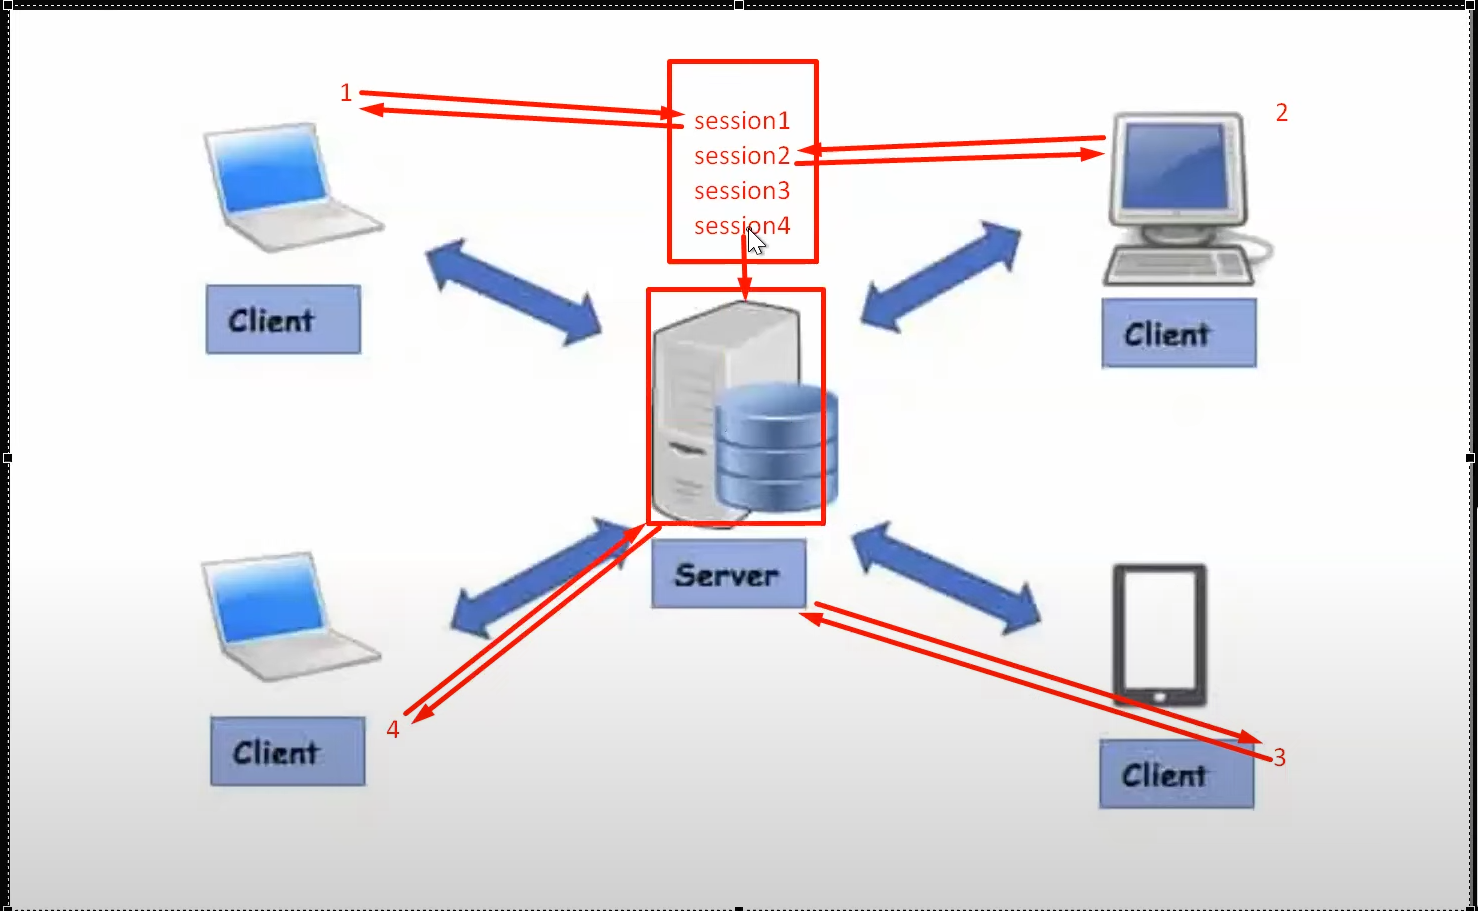

In [ ]:
Khi có nhiều dùng lên, thì bản thân 1 máy chủ Server không chịu tải nổi. 
- **Cách 1: Tăng RAM, CPU (Vertical Scale - Mở rộng theo chiều dọc)**: Phương án này không tối ưu, vì không thể làm mãi được. Vì đến một ngày sẽ đạt đến giới hạn. Mà cũng có nhiều rủi ro. Chỉ 1 con Server mà nó lăn ra chết, thì đi cả hệ thống.
- **Cách 2: Horizontal Scale - Mở rộng theo chiều ngang**: Clone ra thành nhiều con máy chủ khác

![alt text](image.png)

In [ ]:
- Có 4 Server clone từ nhau, giống hệt nhau
- Lúc này, tạo một con server đứng trước, gọi là con Load Balancer. Với vai trò hứng tất cả các Request từ Client gửi lên để chia tải cho các con Server (thuật toán chia tải đều). VD:
	- Request 1 thì đến con Server 1
	- Nhưng Request 2 thì đến con Server 2
- Load Balancer còn biết được con máy chủ nào phía sau chết rồi thì không request  vào nữa. Ví dụ có 4 con, 1 con chết thì vẫn còn 3 con khác để cứu được hệ thống
===
- Người ta lưu Session ở mỗi con Server
- Với thuật toán chia tải đều. Giả sử:
	+ Lần 1: Client 1 request lên -> đi qua Load Balancer -> đá vào Server 1 -> tạo và lưu trữ session 1 ở Server 1
	+ Lần 2: Client 1 request lên -> -> đi qua Load Balancer --> bị đá vào Server 2 (Vì thuật toán chia tải đều). Lúc này nó không thể lấy session 1 nữa --> lập tức Server response  về thì Client 1 bị đăng xuất
	+ Lần 3: --> Server 3: Đăng xuất
	+ Lần 4: --> Server 4: Đăng xuất
	+ Lần 5: --> Server 1: Tự nhiên đăng nhập được vì có Session

> Đó là cách truyền thống, session được lưu dưới dạng file và được lưu trực tiếp chính con Server đó và xảy ra hiện tượng đó
> Phương án: Session không lưu tại file nữa, mà phải lưu vào nơi nào đó chung. VD: Database

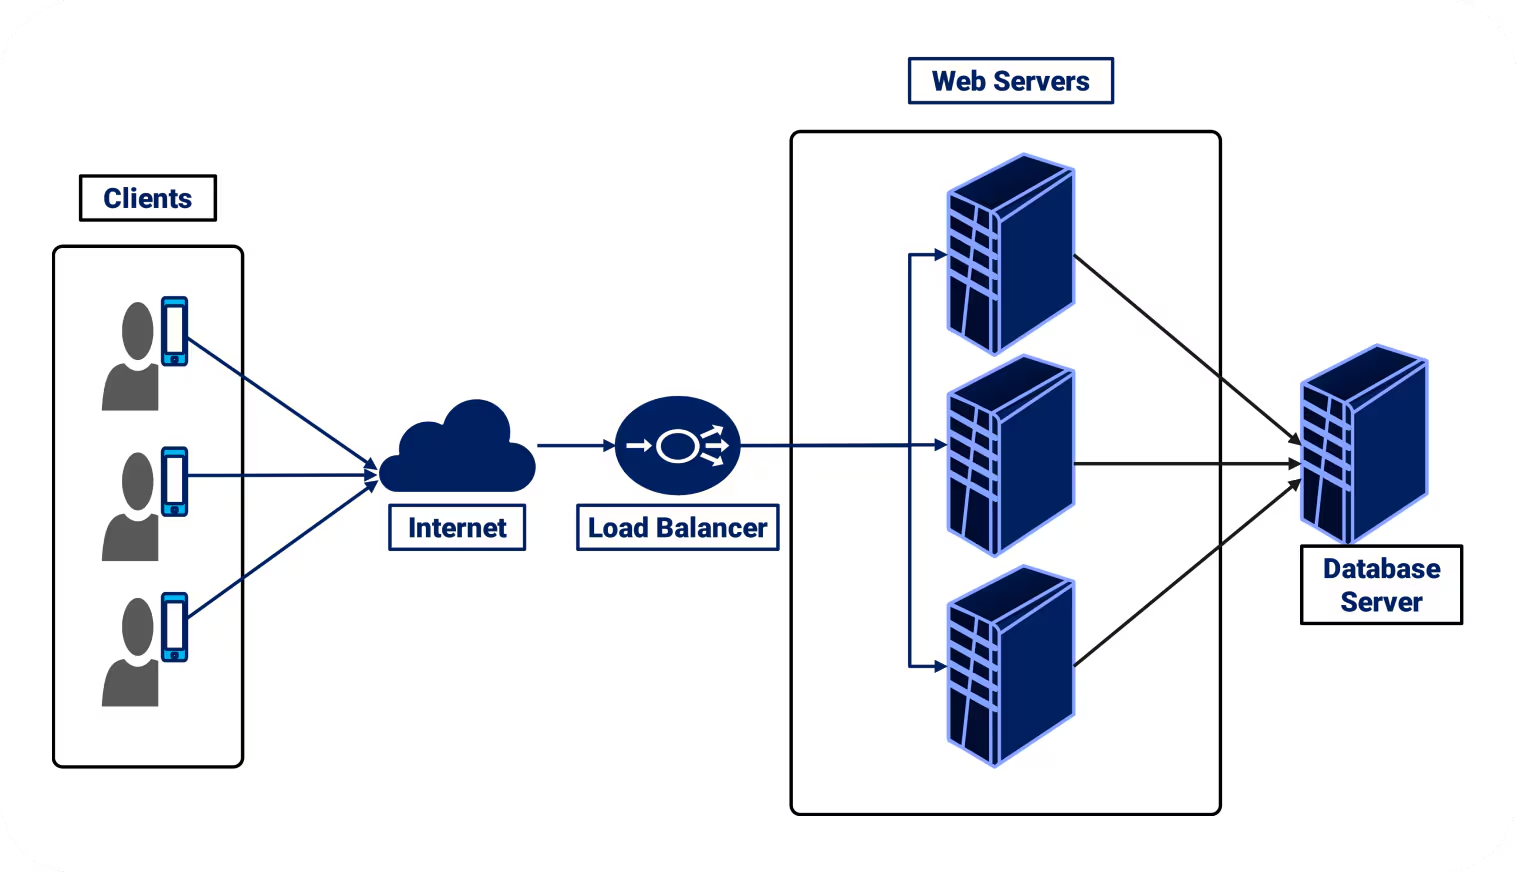

In [ ]:
- Vấn đề được giải quyết. Mỗi lần vào bất cứ con Server nào (thuật toán chia tải đều) thì đều chọc vào DB và lấy được ra Session đó
- Vấn đề là nó lại phải lưu trữ Token (tốn thêm bộ nhớ) và cách triển khai khá phức tạp

In [ ]:
Vậy với mô hình chỉ có 1 con máy chủ. Mà chúng ta không sử dụng Session Based như ban đầu mà sử dụng JWT (Token Base) thì hướng triển khai hoàn toàn khác 
- DB lưu trữ một secret
- Client request vào, tạo và lưu token ở phía Client, lưu ở localStorage 
- (Server không lưu trữ token) --> Server: Stateless

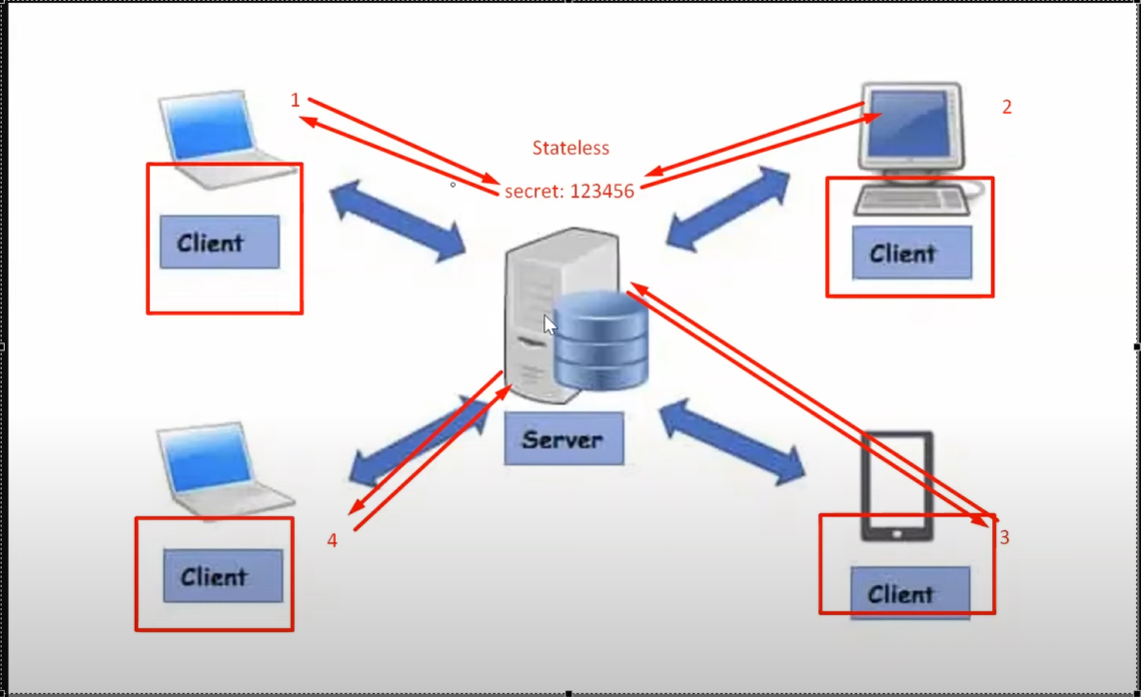

In [ ]:
Đến một ngày đẹp trời, mô hình thay đổi thành Load Balancer:
Với JWT, việc lưu trữ Secret ở file `.env` của Server. Vậy việc clone ra thành 4 con thì cũng clone của Secret ở file `.env` và cả source code
- Với thuật toán chia tải đều. Giả sử:
	+ Lần 1: Client 1 request lên -> đi qua Load Balancer -> đá vào Server 1 -> dùng Secret ký và tạo token trả về phía Client 1 và lưu ở LocalStorage
	+ Lần 2: Client 2 request lên -> -> đi qua Load Balancer --> bị đá vào Server 2 (Vì thuật toán chia tải đều). Bản thân trên con Server 2 nó cũng có Secret key -> theo công thức JWT thì nó verify hợp lệ và response lại
	+ Lần 3: --> Server 3: Đăng xuất
	+ Lần 4: --> Server 4: Đăng xuất
	+ Lần 5: --> Server 1: Tự nhiên đăng nhập được vì có Session

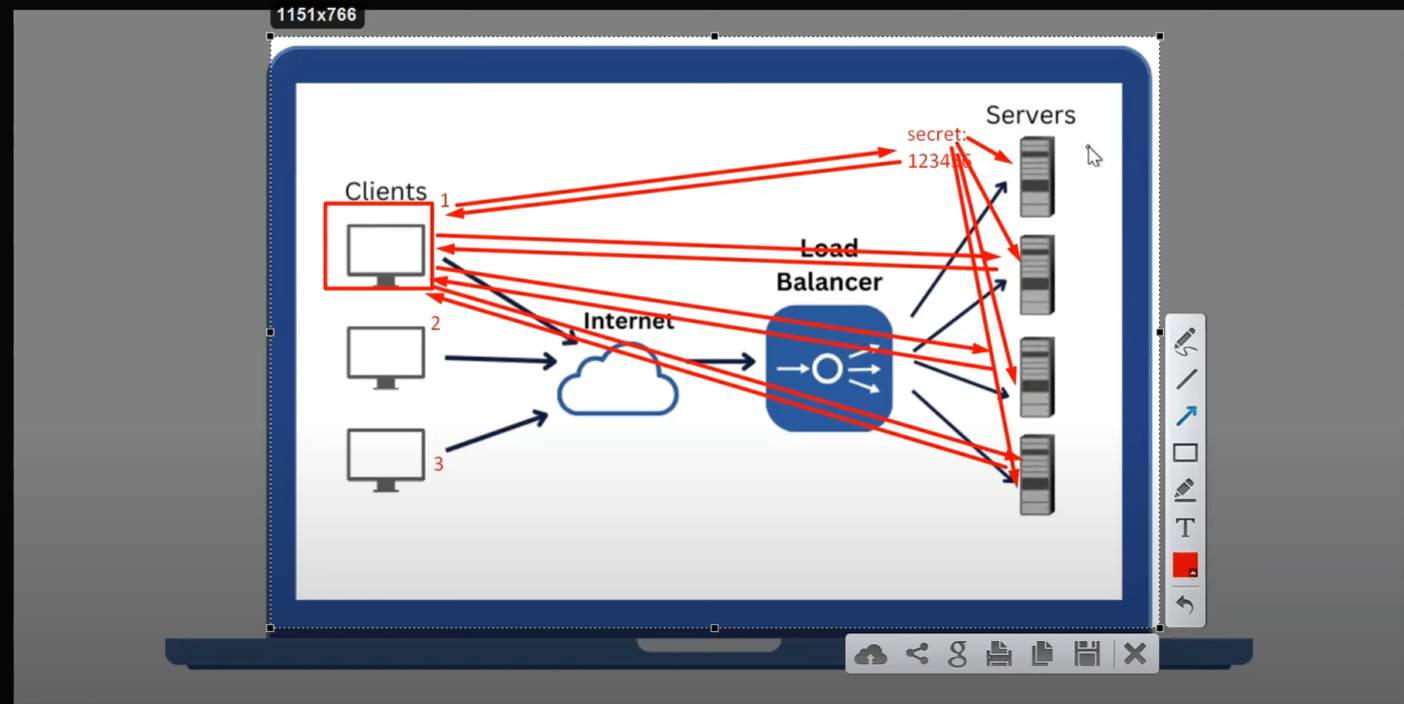